In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0) 

In [34]:
def dadt(a,om,ov,H0):
    ok=1.-om-ov
    res=H0*np.sqrt(om/a+ov*a*a+ok)
    return res

def compa2t(om,ov,H0):
	dt=-1.
	acur=1.
	tcur=0.

	# backwards
	vt=np.zeros(50000)
	va=np.zeros(50000)
	i=0
	while acur>1e-3:
		da=dt*dadt(acur,om,ov,H0)
		acur=acur+da
		tcur=tcur+dt
		va[i]=acur
		vt[i]=tcur
		i=i+1


	# Forwards
	dt=1
	acur=1
	tcur=1
	signe=1
	while acur<2.0:
		da=dt*signe*dadt(acur,om,ov,H0)
		acur=acur+da
		tcur=tcur+dt
		if(om/acur+ov*acur*acur+(1.-om-ov))<0:
			acur=acur-2*da
			signe=-1
		va[i]=acur
		vt[i]=tcur
		if acur<1e-2:
			break
		i=i+1


	# remove zero
	va=va[0:i]
	vt=vt[0:i]

	# sort
	ss=np.argsort(vt)
	vt=vt[ss]
	va=va[ss]



	return va,vt





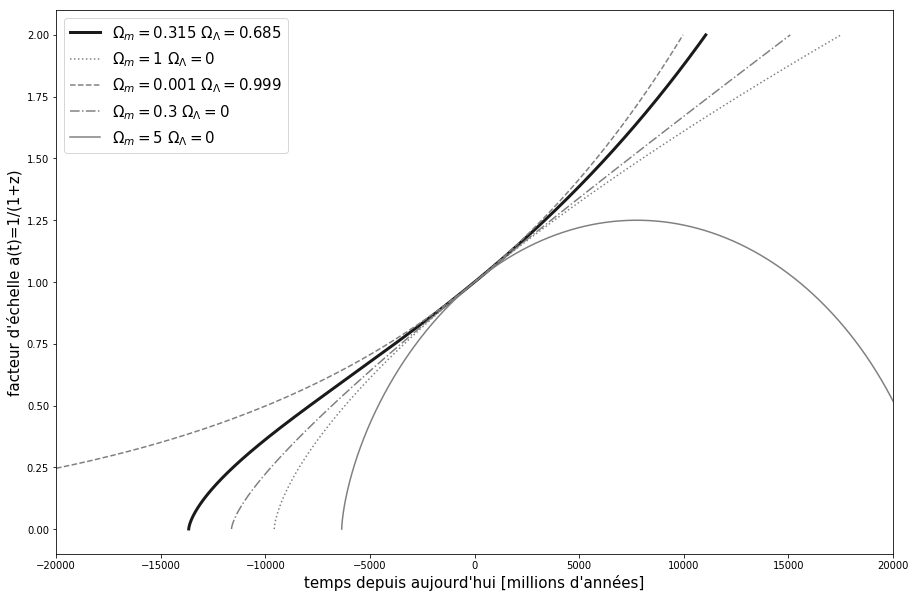

In [36]:
plt.figure()

om=0.315
ov=0.685
H0=68e3/3.08e22*(1e6*365*24*3600.)
va,vt=compa2t(om,ov,H0)
plt.plot(vt,va,c='0.1',linewidth=3)

om=1.0
ov=0.
va,vt=compa2t(om,ov,H0)
plt.plot(vt,va,c='0.5',linestyle=':')

om=0.001
ov=0.999
va,vt=compa2t(om,ov,H0)
plt.plot(vt,va,c='0.5',linestyle='--')

om=0.3
ov=0.
va,vt=compa2t(om,ov,H0)
plt.plot(vt,va,c='0.5',linestyle='-.')


om=5
ov=0.
va,vt=compa2t(om,ov,H0)
plt.plot(vt,va,c='0.5')

plt.legend([r'$\Omega_m=0.315$ $\Omega_\Lambda=0.685$',r'$\Omega_m=1$ $\Omega_\Lambda=0$',r'$\Omega_m=0.001$ $\Omega_\Lambda=0.999$',r'$\Omega_m=0.3$ $\Omega_\Lambda=0$',r'$\Omega_m=5$ $\Omega_\Lambda=0$'],loc=2,fontsize=15)
plt.xlabel("temps depuis aujourd'hui [millions d'années]",fontsize=15)
plt.ylabel("facteur d'échelle a(t)=1/(1+z)",fontsize=15)
plt.xlim([-20000,20000])
plt.savefig('a2t_cosmo.png',dpi=200,bbox_inches='tight')

In [38]:
x49=np.loadtxt("om49.dat")
x10=np.loadtxt("om10.dat")
x100=np.loadtxt("om100.dat")

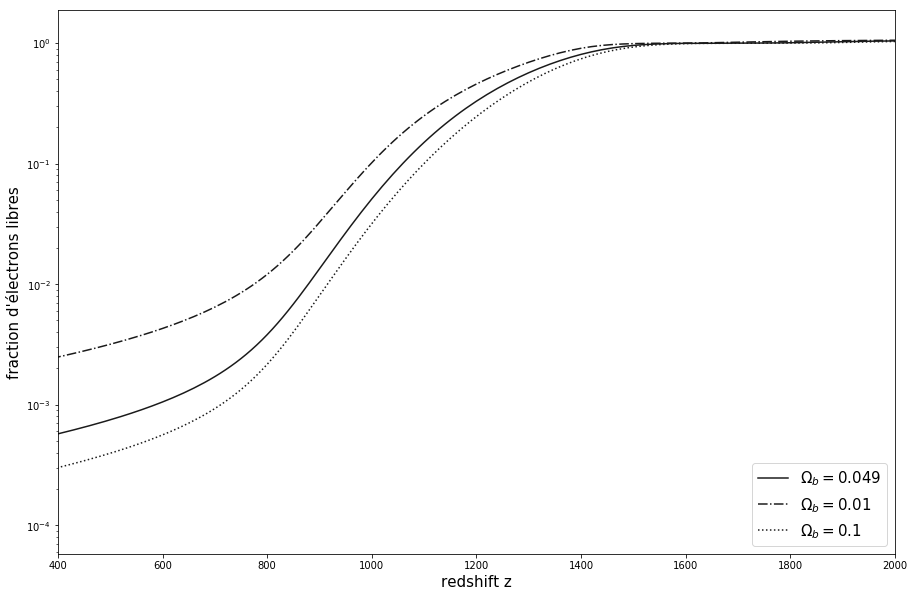

In [50]:
plt.figure()
plt.plot(x49[:,0],x49[:,1],c='0.1')
plt.plot(x10[:,0],x10[:,1],linestyle='-.',c='0.1')
plt.plot(x100[:,0],x100[:,1],linestyle=':',c='0.1')
plt.legend([r'$\Omega_b=0.049$',r'$\Omega_b=0.01$',r'$\Omega_b=0.1$'],loc=4,fontsize=15)
plt.yscale('log')
plt.xlabel('redshift z',fontsize=15)
plt.ylabel("fraction d'électrons libres",fontsize=15)
plt.xlim([400,2000])
plt.savefig('recom.png',dpi=200,bbox_inches='tight')

In [6]:
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
hdul = fits.open('COM_PowerSpect_CMB_R2.02.fits')

In [8]:
thlow=np.loadtxt('thlow.txt',delimiter=';')
thhigh=np.loadtxt('thhigh.txt',delimiter=';')

In [9]:
lowl=hdul[1].data['ELL']
lowDl=hdul[1].data['D_ELL']
lowlerrup=hdul[1].data['ERRUP']
lowlerrdo=hdul[1].data['ERRDOWN']

highl=hdul[7].data['ELL']
highDl=hdul[7].data['D_ELL']
highlerr=hdul[7].data['ERR']


Text(0.5,0,'toto')

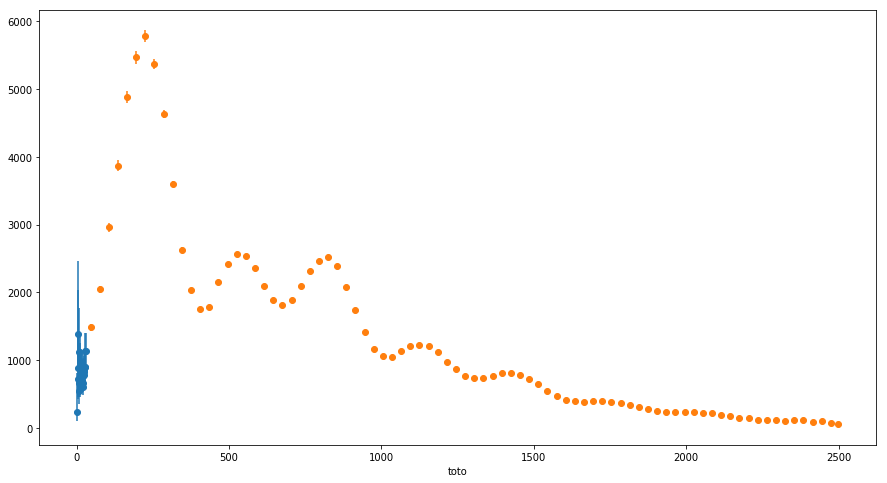

In [52]:
plt.figure()
plt.errorbar(lowl,lowDl,yerr=[errdo,errup],linestyle='none',marker='o')
plt.errorbar(highl,highDl,yerr=highlerr,linestyle='none',marker='o')
plt.xlabel('toto')

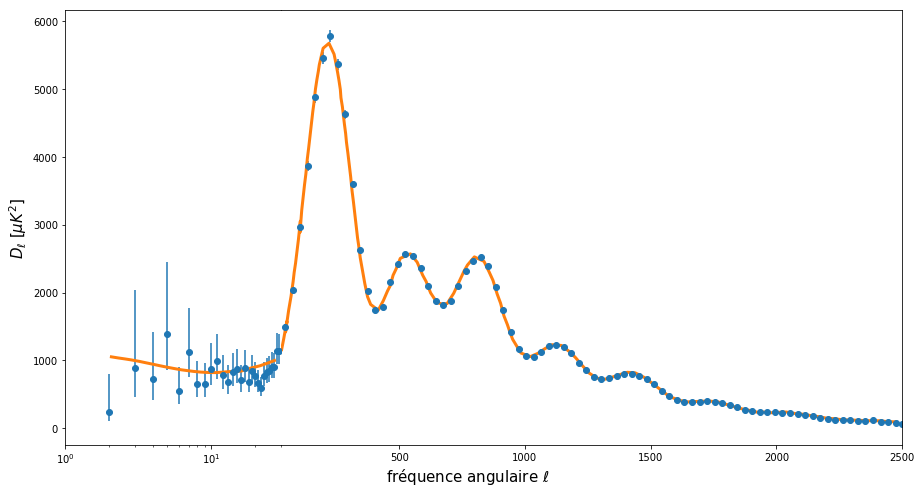

In [13]:

plt.figure()
axMain = plt.subplot(111)
axMain.errorbar(highl,highDl,yerr=highlerr,linestyle='none',marker='o')
axMain.plot(thhigh[:,0],thhigh[:,1],linewidth=3)

axMain.set_xscale('linear')
axMain.set_xlim((30, 2500))
axMain.spines['left'].set_visible(False)
axMain.yaxis.set_ticks_position('right')
axMain.yaxis.set_visible(False)
axMain.xaxis.set_label(r'fréquence angulaire $\ell$')


divider = make_axes_locatable(axMain)
axLin = divider.append_axes("left", size=3.0, pad=0, sharey=axMain)
axLin.set_xscale('log')
axLin.set_xlim((1, 30))
axLin.errorbar(lowl, lowDl, yerr=[lowlerrdo,lowlerrup],linestyle='none',marker='o')
axLin.plot(thlow[:,0],thlow[:,1],linewidth=3)

axLin.spines['right'].set_visible(False)
axLin.yaxis.set_ticks_position('left')
plt.setp(axLin.get_xticklabels(), visible=True)
axMain.set_xlabel(r'fréquence angulaire $\ell$',size=15)
axMain.xaxis.set_label_coords(0.3,-0.05)
plt.ylabel(r'$D_\ell$ [$\mu K^2$]',size=15)
plt.savefig('clplanck_ok.png',dpi=200,bbox_inches='tight')

In [39]:
sndata=np.loadtxt('SN.txt',usecols=(2,3,4,5))
VSN=sndata[:,0]
DSN=sndata[:,1]

fpdata=np.loadtxt('FP.txt',usecols=(2,3,4))
VFP=fpdata[:,0]
DFP=fpdata[:,2]

tdata=np.loadtxt('TF.txt',usecols=(1,2,3,4))
VTF=tdata[:,0]
DTF=tdata[:,3]

sdata=np.loadtxt('SB.txt',usecols=(1,2,3))
VSB=sdata[:,0]
DSB=sdata[:,2]


In [40]:
VSB

array([ 7441.,  3118.,  4831.,  3468.,  3341.,  5061.])

In [41]:
DSB

array([ 102.3,   36.3,   68.2,   51.5,   55.5,   67.3])

<IPython.core.display.Javascript object>


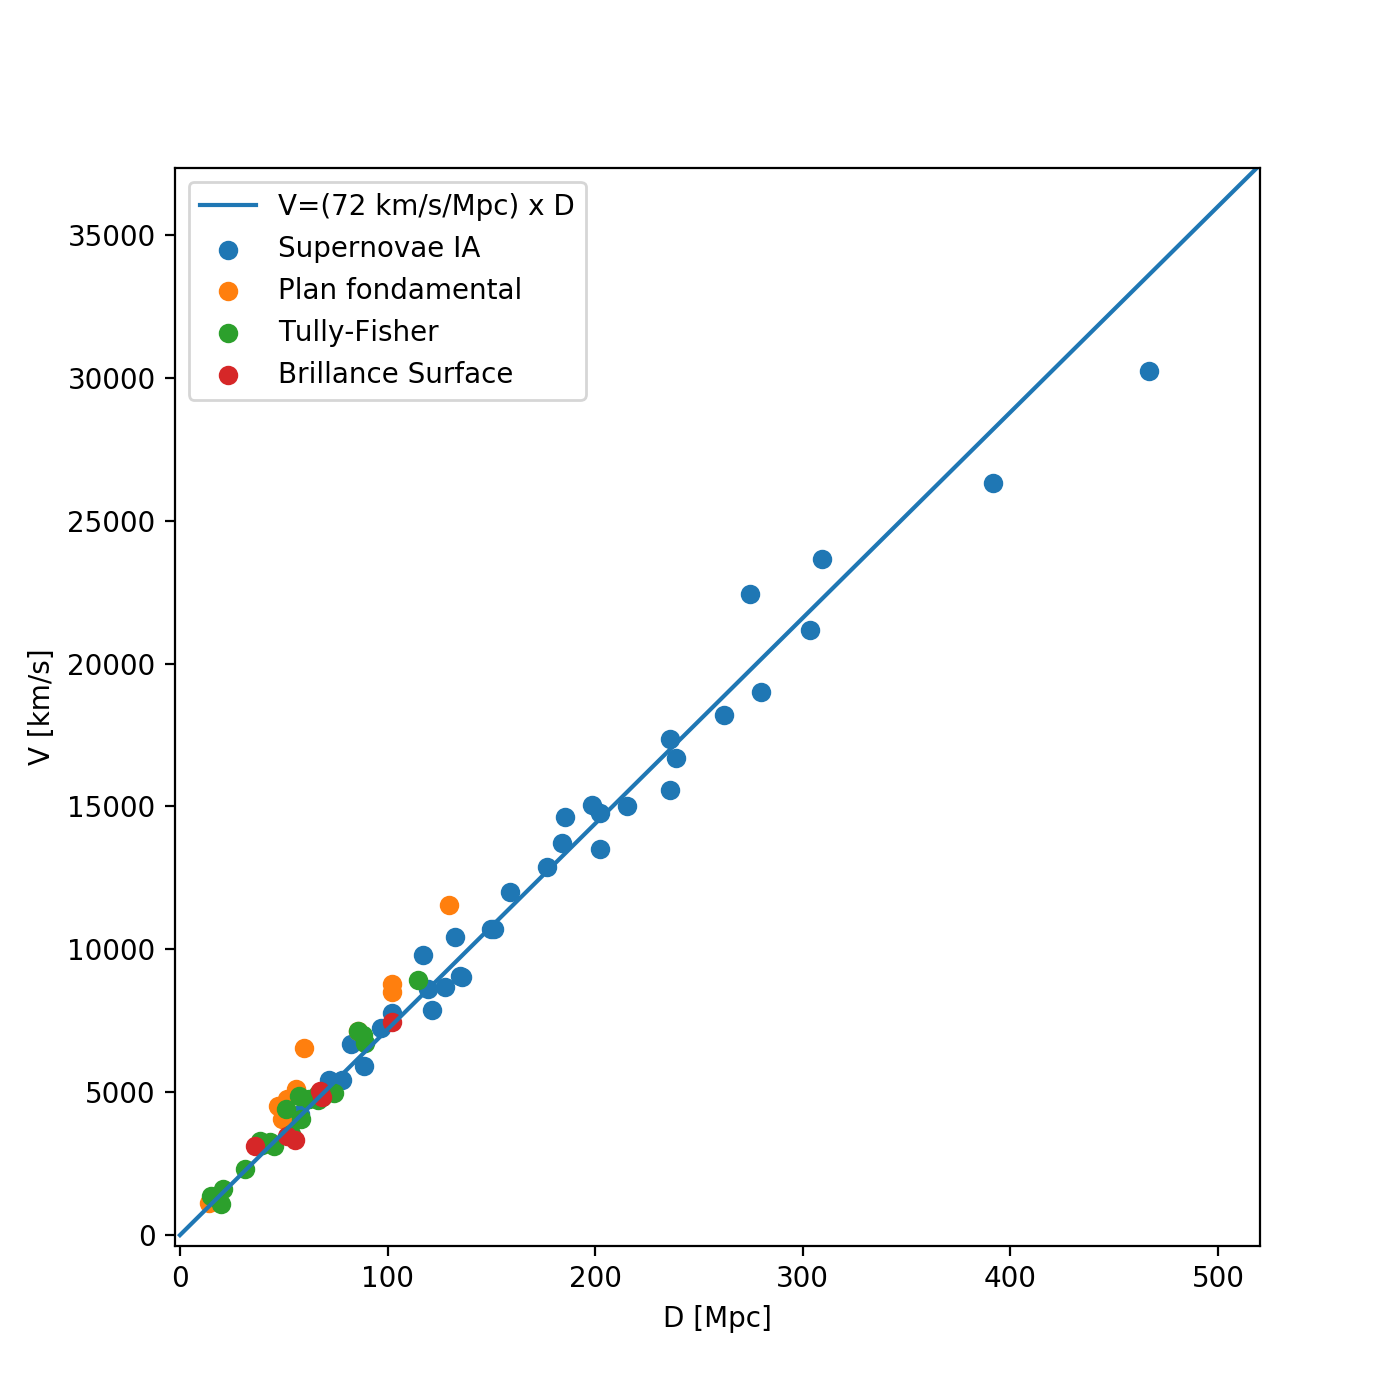

In [47]:
plt.figure()
plt.scatter(DSN,VSN)
plt.scatter(DFP,VFP)
plt.scatter(DTF,VTF)
plt.scatter(DSB,VSB)
dd=np.arange(0,1000)
plt.plot(dd,72*dd)
plt.xlabel('D [Mpc]')
plt.ylabel('V [km/s]')
plt.legend(['V=(72 km/s/Mpc) x D','Supernovae IA','Plan fondamental','Tully-Fisher','Brillance Surface'])